In [1]:
import setup

In [2]:
from smarty.datasets import load_data

ds = load_data("datasets/ionosphere.txt", header=False)
ds.batch(32).repeat(True).shuffle(200)
ds.info()


DataSet at 0x1087c96f0
	Rows: 351
	Cols: 35

	name           	          dtype
	0              	          uint8
	1              	          uint8
	2              	        float32
	3              	        float32
	4              	        float32
	5              	        float32
	6              	        float32
	7              	        float32
	8              	        float32
	9              	        float32
	10             	        float32
	11             	        float32
	12             	        float32
	13             	        float32
	14             	        float32
	15             	        float32
	16             	        float32
	17             	        float32
	18             	        float32
	19             	        float32
	20             	        float32
	21             	        float32
	22             	        float32
	23             	        float32
	24             	        float32
	25             	        float32
	26             	        float32
	27             	        float

In [3]:
ds.descr_cat()

          34               
   count  351.00000        
  unique  2.00000          
    freq  0.00570          
    Top1  g (225)          
    Top2  b (126)          
    Top3         -         
   dtype  <U1              


In [4]:
from smarty.preprocessing.categorical import OneHotEncoder

encoder = OneHotEncoder()
target = ds.drop_c(-1)
target = encoder.fit_transform(target.numpy())

ds.add_c(target, columns=encoder.flat_names_())
ds.set_target_classes(encoder.flat_names_())
print()

/Users/user/Desktop/projects/ml/examples/./../smarty/datasets/datasets.py:44: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  empty = np.where(col=='')[0]


In [5]:
from smarty.datasets import train_test_split

train_ds, test_ds = train_test_split(ds)

In [6]:
from smarty.models.lvq import LVQ
from smarty.callbacks import LearningRateSheduler

model = LVQ(learning_rate=0.03, n_codebooks=20)
cb = [LearningRateSheduler()]

model.fit(train_ds, epochs=50, callbacks=cb)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting training model for 50 epochs.
Epoch 1/50
	Step 9/9 - accuracy: 0.6342592592592592, 


Epoch 2/50
	Step 9/9 - accuracy: 0.6724537037037037, 

Learning rate sheduled to 0.0294

Epoch 3/50
	Step 9/9 - accuracy: 0.8391203703703703, 

Learning rate sheduled to 0.028224

Epoch 4/50
	Step 9/9 - accuracy: 0.8599537037037037, 

Learning rate sheduled to 0.026530559999999998

Epoch 5/50
	Step 9/9 - accuracy: 0.8460648148148148, 

Learning rate sheduled to 0.0244081152

Epoch 6/50
	Step 9/9 - accuracy: 0.8530092592592592, 

Learning rate sheduled to 0.02196730368

Epoch 7/50
	Step 9/9 - accuracy: 0.869212962962963,  

Learning rate sheduled to 0.0193312272384

Epoch 8/50
	Step 9/9 - accuracy: 0.8668981481481481, 

Learning rate sheduled to 0.016624855425024

Epoch 9/50
	Step 9/9 - accuracy: 0.8819444444444444, 

Learning rate sheduled to 0.01396487855702016

Epoch 10/50
	Step 9/9 - accuracy: 0.8576388888888888, 

Learning rate sheduled to 0.0

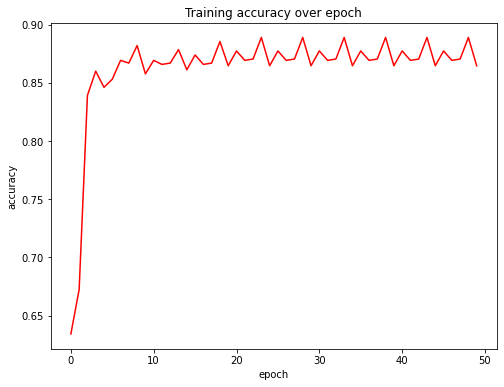

In [7]:
model.plot_training()

In [8]:
model.evaluate(test_ds)

<*><*><*><*><*><*><*><*><*><*><*><*><*><*><*>
Starting making predictions.
Epoch 1/1
	Step 3/3

accuracy: 0.8873239436619719.


{'accuracy': 0.8873239436619719}